In [2]:
import kagglehub
import shutil
import os

# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

# Define target directory
target_dir = "/content/"

# Copy the dataset to /content/
if os.path.exists(path):
    shutil.copytree(path, os.path.join(target_dir, os.path.basename(path)))
    print("Dataset copied to /content/")
else:
    print("Download path does not exist.")

print("Path to dataset files:", os.path.join(target_dir, os.path.basename(path)))


Dataset copied to /content/
Path to dataset files: /content/chest-xray-pneumonia


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [3]:
data = "/content/chest-xray-pneumonia/chest_xray/chest_xray/train"

In [4]:
cat = ["NORMAL", "PNEUMONIA"]

In [5]:
import os

for root, dirs, files in os.walk("/content/chest-xray-pneumonia", topdown=True):
    print(root)
    break  # Just print top-level directory


/content/chest-xray-pneumonia


In [17]:
# Set paths
train_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/train"
val_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/val"
test_path = "/content/chest-xray-pneumonia/chest_xray/test"

# Rescale images
datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    classes=["NORMAL", "PNEUMONIA"]
)

# Load validation data
val_generator = datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    classes=["NORMAL", "PNEUMONIA"]
)

# Load test data
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    classes=["NORMAL", "PNEUMONIA"]
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define CNN model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 309ms/step - accuracy: 0.7714 - loss: 0.5781 - val_accuracy: 0.8125 - val_loss: 0.3615
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 303ms/step - accuracy: 0.9445 - loss: 0.1588 - val_accuracy: 0.7500 - val_loss: 0.4649
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 297ms/step - accuracy: 0.9506 - loss: 0.1435 - val_accuracy: 0.8125 - val_loss: 0.3651
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 337ms/step - accuracy: 0.9692 - loss: 0.1093 - val_accuracy: 0.8750 - val_loss: 0.3253
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 320ms/step - accuracy: 0.9703 - loss: 0.0858 - val_accuracy: 0.8125 - val_loss: 0.6566
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 305ms/step - accuracy: 0.9700 - loss: 0.0943 - val_accuracy: 0.8125 - val_loss: 0.5739
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 301ms/step - accuracy: 0.9772 - loss: 0.0702 - val_accuracy: 0.8750 - val_loss: 0.3424
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 301ms/step - accuracy: 0.9781 - loss: 0

In [12]:
model.save("pneumonia_model.h5")


In [18]:
# Evaluate on test data
train_loss, train_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {train_accuracy:.4f}")
print(f"Test Loss: {train_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.5996 - loss: 2.2699
Test Accuracy: 0.7756
Test Loss: 1.3093


In [19]:
# Predict probabilities
y_prob = model.predict(test_generator)
y_pred = (y_prob > 0.5).astype("int32").flatten()

# Get true labels
y_true = test_generator.classes

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA"]))


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.41      0.58       234
   PNEUMONIA       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.83      0.78      0.75       624



In [20]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8750 - loss: 0.3714
Validation Accuracy: 0.8750
Validation Loss: 0.3714


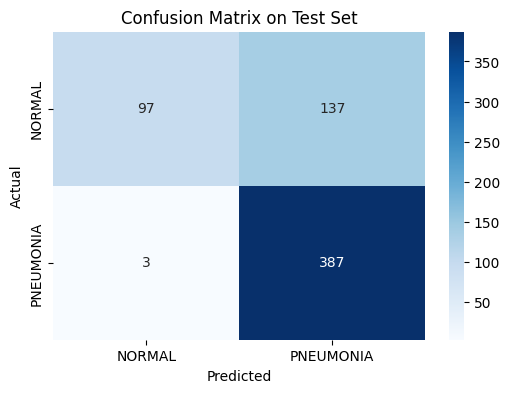

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["NORMAL", "PNEUMONIA"],
            yticklabels=["NORMAL", "PNEUMONIA"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')
plt.show()


In [22]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 0.5996 - loss: 2.2699
Test Accuracy: 0.7756
Test Loss: 1.3093


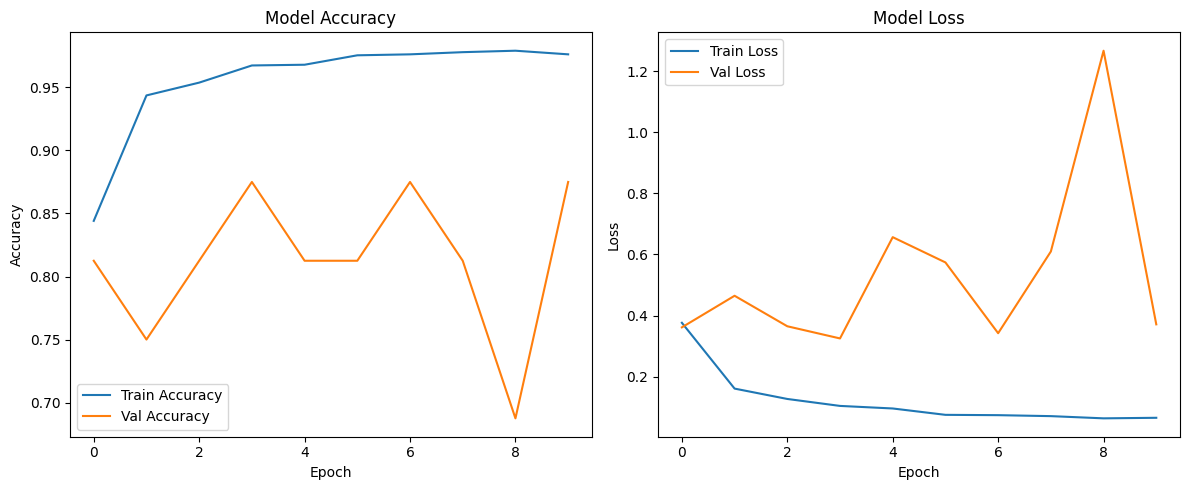

In [23]:
# Assuming you stored model history like:
# history = model.fit(...)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.8751 - loss: 0.2838

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 353ms/step - accuracy: 0.8755 - loss: 0.2830 - val_accuracy: 0.6875 - val_loss: 0.6411
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 342ms/step - accuracy: 0.9774 - loss: 0.0672 - val_accuracy: 0.8750 - val_loss: 0.3022
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 346ms/step - accuracy: 0.9779 - loss: 0.0557 - val_accuracy: 0.8750 - val_loss: 0.3026
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 343ms/step - accuracy: 0.9810 - loss: 0.0536 - val_accuracy: 0.8125 - val_loss: 0.4687
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 349ms/step - accuracy: 0.9887 - loss: 0.0334 - val_accuracy: 0.8125 - val_loss: 0.4859
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 341ms/step - accuracy: 0.9875 - loss: 0.0392 - val_accuracy: 0.8750 - val_loss: 0.4012
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 342ms/step - accuracy: 0.9947 - loss: 0.0228 - val_accuracy: 0.8750 - val_loss: 0.1307
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 343ms/step - accuracy: 0.9913 - loss: 0.0244 - val

Model saved as vgg16_pneumonia_finetuned.h5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.6149 - loss: 2.6368
Test Accuracy: 0.7772
Test Loss: 1.5746
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.99      0.41      0.58       234
   PNEUMONIA       0.74      1.00      0.85       390

    accuracy                           0.78       624
   macro avg       0.86      0.70      0.71       624
weighted avg       0.83      0.78      0.75       624



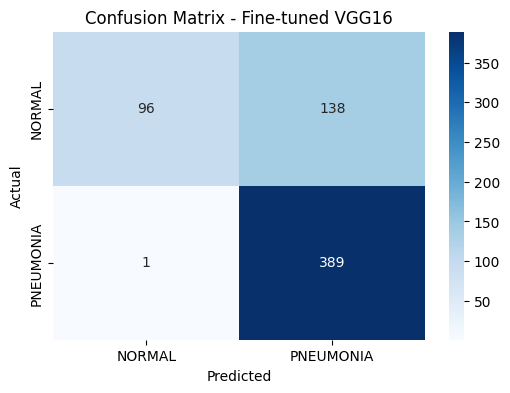

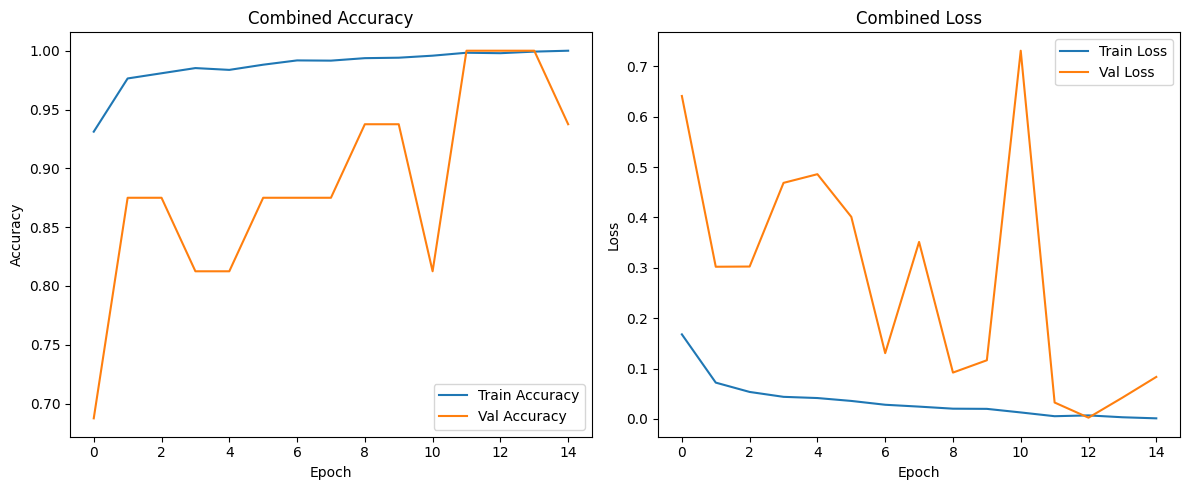

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Paths
train_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/train"
val_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/val"
test_path = "/content/chest-xray-pneumonia/chest_xray/test"

# Image size for VGG16
img_size = (224, 224)

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_path, target_size=img_size, batch_size=32,
    class_mode='binary', classes=["NORMAL", "PNEUMONIA"]
)

val_generator = datagen.flow_from_directory(
    val_path, target_size=img_size, batch_size=32,
    class_mode='binary', classes=["NORMAL", "PNEUMONIA"]
)

test_generator = datagen.flow_from_directory(
    test_path, target_size=img_size, batch_size=32,
    class_mode='binary', shuffle=False, classes=["NORMAL", "PNEUMONIA"]
)

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile and train the top layers only
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# ✅ FINE-TUNING STEP BELOW
# Unfreeze last few layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile with a lower learning rate
model.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = model.fit(train_generator, validation_data=val_generator, epochs=5)

# Save the fine-tuned model
model.save("vgg16_pneumonia_finetuned.h5")
print("Model saved as vgg16_pneumonia_finetuned.h5")

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict & report
y_prob = model.predict(test_generator)
y_pred = (y_prob > 0.5).astype("int32").flatten()
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA"]))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["NORMAL", "PNEUMONIA"],
            yticklabels=["NORMAL", "PNEUMONIA"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fine-tuned VGG16")
plt.show()

# Plot combined training history
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Combined Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Val Loss')
plt.title("Combined Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
